# Game Sales Data Analysis

In this analysis, I will explore factors that influence video games success to help the online store, Ice, optimize its advertising campaigns for the 2017 year. Using a dataset with dates spanning from 1985 to 2016, I will variables such as user reviews, genres, platforms (e.g., Xbox, PlayStation), sales data, and ESRB (Entertainment Software Rating Board) ratings. The ESRB ratings provide insights into the target audience by categorizing games based on content suitability, such as Teen or Mature.

The primary objective is to identify patterns and trends that determine whether a game succeeds in the market. By analyzing these factors, I will pinpoint most successful platforms and strategically plan advertising campaigns to maximize revenue in the next year. This analysis will help make future data-driven decisions to ensure Ice remains competitive in the rapidly evolving video game industry.

## Initializating and Preparing Data

In [37]:
# loading all the libraries
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import display_html
from scipy import stats as st
import plotly.express as px
import seaborn as sns
import numpy as np

In [38]:
games = pd.read_csv('/datasets/games.csv'); games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


According to the documentation:
- `'Name'` — Name of the video game
- `'Platform'` — Platform of where the video game was released
- `'Year_of_Release '` — The year the video game was released
- `'Genre '` — The genre or category of the video game
- `'NA_Sales'` — Total sales of the video game in North America (in millions of units)
- `'EU_Sales'` — Total sales of the video game in Europe (in millions of units)
- `'JP_Sales'` — Total sales of the video game in Japan (in millions of units)
- `'Other_sales'` — Total sales of the video game in other regions (in millions of units)
- `'Critic_Score '` — Average score given by professional critics (0-100)
- `'User_Score '` — Average score given by users (typically on a scale of 0 to 10)
- `'Rating'` — The official content rating of the video game
 
Specifically, the ESRB Ratings:
- `E` - Everyone  
- `T` - Teen  
- `M` - Mature  
- `E10+` - Everyone 10+  
- `EC` - Early Childhood  
- `AO` - Adults Only  
- `RP` - Rating Pending  

In [39]:
games.columns = games.columns.str.lower() # lowercasing column names
games.duplicated().sum() # checking for duplicates

0

In [40]:
games.isna().sum() # checking for missing values

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [63]:
# drop unnecessary values
games = games.dropna(subset=['year_of_release', 'name', 'genre'])
# converting data (with missing values) to required types
games['user_score'] = pd.to_numeric(games['user_score'].replace('tbd', np.nan), errors='coerce')
games['critic_score'] = pd.to_numeric(games['critic_score'], errors='coerce')
games['year_of_release'] = games['year_of_release'].astype(int)
games['user_score'] = pd.to_numeric(games['user_score']).astype(float)
# add a total sales column in the dataframe
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.info() # general summary/information

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


In the preparation phase, I addressed several issues to make sure the dataset was clean and ready for analysis. First, I converted all variable names to lowercase for uniformity. Next, I checked for duplicate entries and confirmed there were none. Then, I identified missing values in several columns, including `name`, `year_of_release`, `genre`, `critic_score`, `user_score`, and `rating`. To handle these, I dropped rows with missing values in `name`, `year_of_release`, `genre`, and `rating`, as these fields are critical for analysis and cannot be reasonably replaced with an integer. For the `user_score` column, I removed missing values before replacing entries marked as 'tbd' with 0. Similarly, I addressed missing values in the `critic_score` column by filling them with 0. Prior to handling the missing values in `user_score`, I converted its data type from object to float to accommodate decimal values. Additionally, I standardized the data types by converting the `year_of_release` and `critic_score` columns to integers. Lastly, to enhance the dataset for analysis, I also added a `total_sales` column, which sums all sales data across North America, Europe, and Japan.

With these steps completed, the dataset is now clean and ready for analysis.

## Analyzing the Data

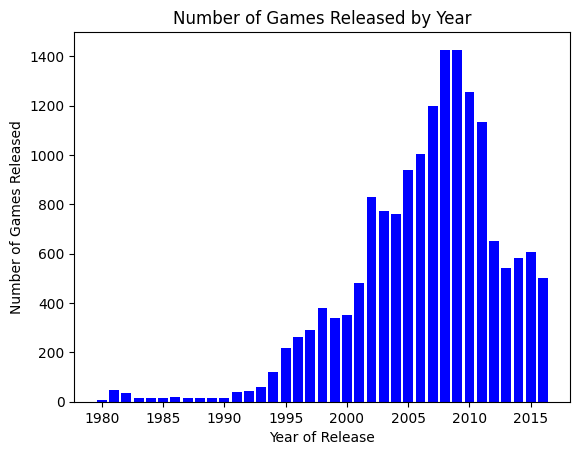

In [45]:
year_counts = games['year_of_release'].value_counts().reset_index().rename(
    columns={'index': 'year', 'year_of_release': 'count'})
plt.bar(year_counts['year'], year_counts['count'], color='blue')
plt.xlabel('Year of Release')
plt.ylabel('Number of Games Released')
plt.title('Number of Games Released by Year');

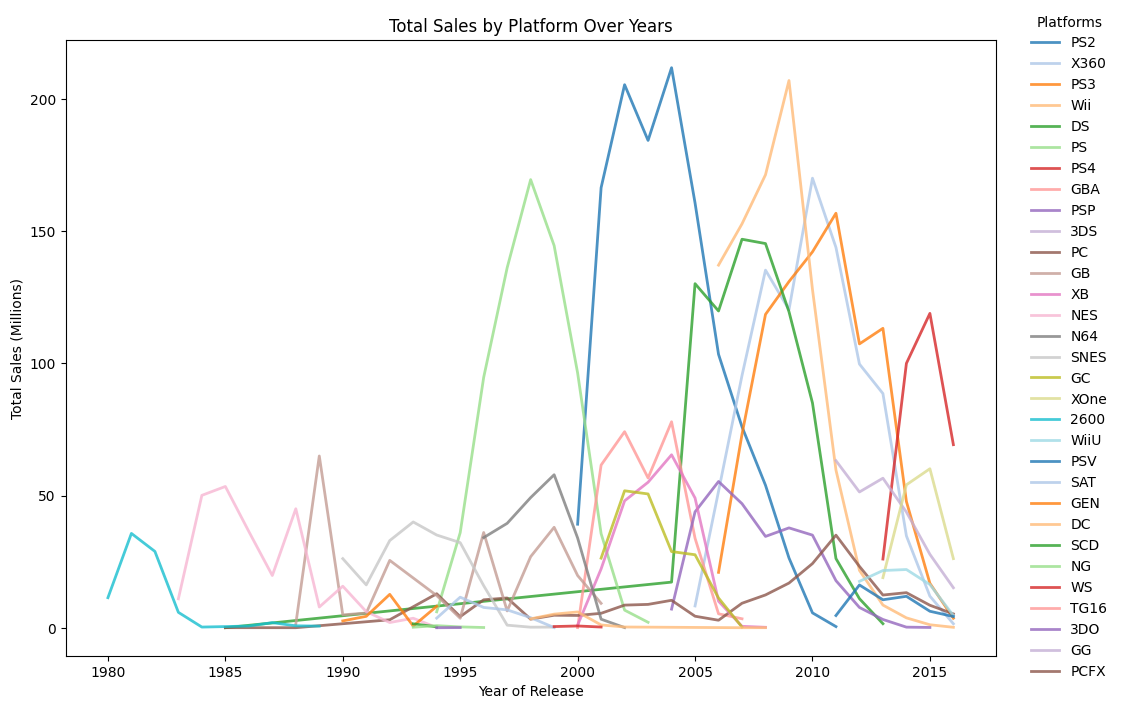

In [62]:
plt.figure(figsize=(12, 8))
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab20.colors)

for i in range(len(top_sales)):
    platform = top_sales['platform'][i]
    graph = games[games['platform'] == 
                  platform].groupby('year_of_release')['total_sales'].sum().reset_index()
    plt.plot(graph['year_of_release'], graph['total_sales'], label=f"{platform}", alpha=0.8, linewidth=2)

plt.xlabel('Year of Release')
plt.ylabel('Total Sales (Millions)')
plt.title('Total Sales by Platform Over Years')
plt.legend(bbox_to_anchor=(1.025, 1.06), title='Platforms', frameon=False)
plt.show()

Look at how many games were released in different years. Is the data for every period significant? 

Find platforms that used to be popular but now have zero sales. 
How long does it generally take for new platforms to appear and old ones to fade?

Which platforms are leading in sales? 
Which ones are growing or shrinking? Select several potentially profitable platforms.

<Figure size 1200x800 with 0 Axes>

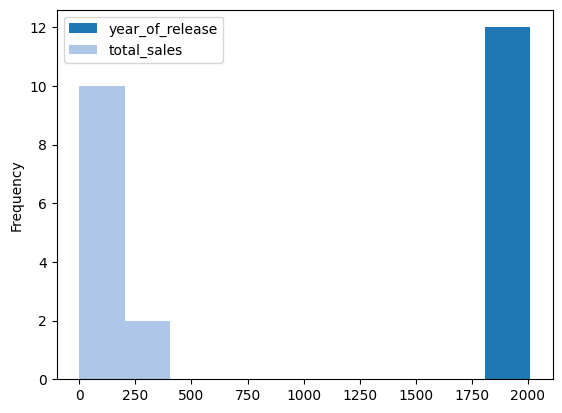

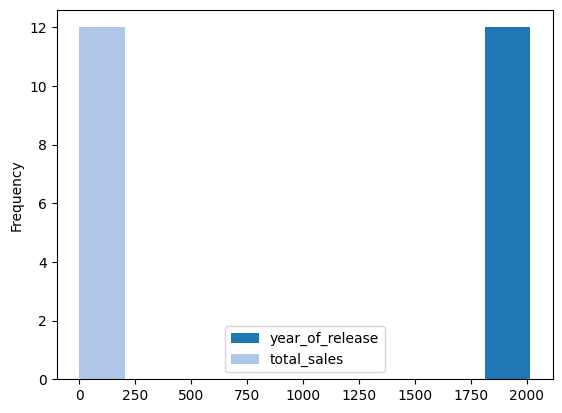

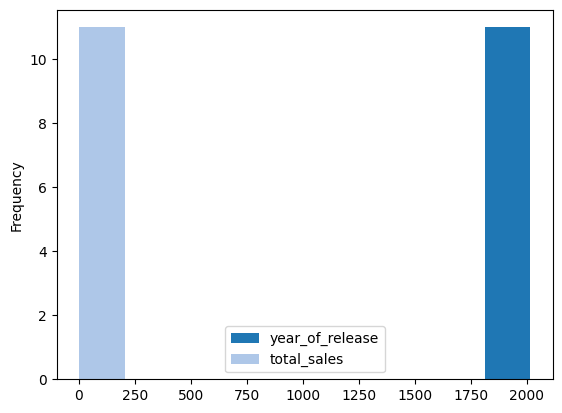

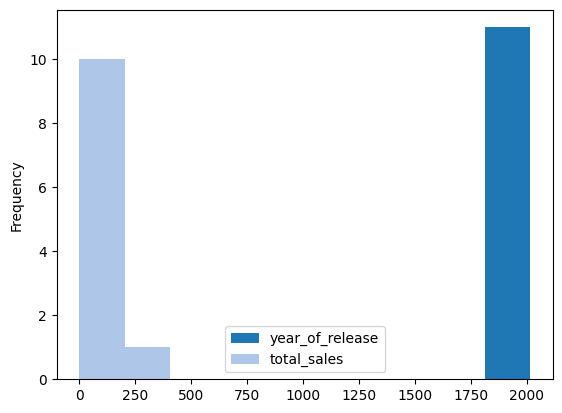

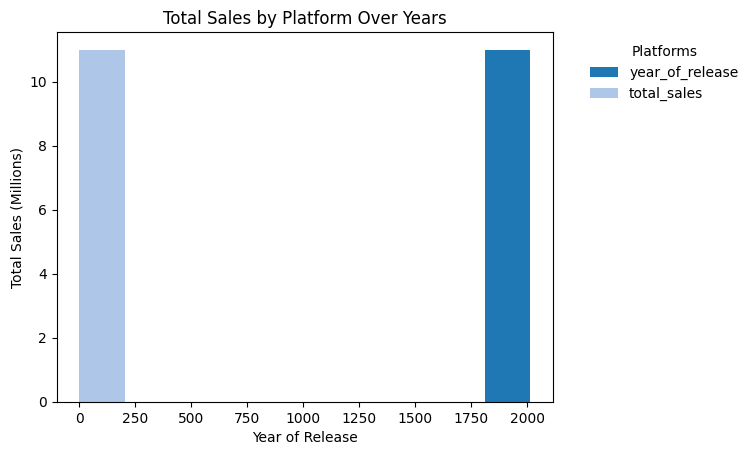

In [65]:
plt.figure(figsize=(12, 8))
top_5 = list(top_sales['platform'].head())

for i in top_5:
    platform = top_sales['platform'][i]
    graph = games[games['platform'] == 
                  platform].groupby('year_of_release')['total_sales'].sum().reset_index()
    graph.plot(kind='hist')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (Millions)')
plt.title('Total Sales by Platform Over Years')
plt.legend(bbox_to_anchor=(1.05, 1), title='Platforms', frameon=False)

Look at how sales varied from platform to platform. 
Choose the platforms with the greatest total sales and build a distribution based on data for each year.

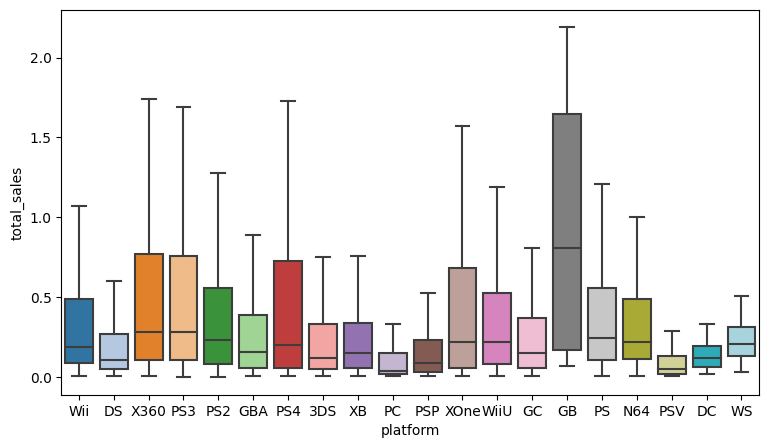

In [79]:
# Build a box plot for the global sales of all games, broken down by platform. 
# Are the differences in sales significant? 
# What about average sales on various platforms? Describe your findings.
plt.figure(figsize=(9, 5))
games = games[games['year_of_release'] >= 2000]
sns.boxplot(x='platform', y='total_sales', data=games[['platform', 'total_sales']], showfliers=False);

Determine what period you should take data for. 
To do so, look at your answers to the previous questions. 
The data should allow you to build a model for 2017.
Work only with the data that you've decided is relevant. Disregard the data for previous years.

In [12]:
# Take a look at how user and professional reviews affect sales for one popular platform (you choose). 
# Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.


Keeping your conclusions in mind, compare the sales of the same games on other platforms.

In [13]:
# Take a look at the general distribution of games by genre. 
# What can we say about the most profitable genres? 
# Can you generalize about genres with high and low sales?

## Creating User Profile for each Region

In [14]:
def profile(x):
    if x == 'rating':
        na = games.groupby(x)['na_sales'].sum().reset_index().sort_values(
            by='na_sales', ascending=False).reset_index(drop=True)
        eu = games.groupby(x)['eu_sales'].sum().reset_index().sort_values(
            by='eu_sales', ascending=False).reset_index(drop=True)
        jp = games.groupby(x)['jp_sales'].sum().reset_index().sort_values(
            by='jp_sales', ascending=False).reset_index(drop=True)
    else:
        na = games.groupby(x)['na_sales'].sum().reset_index().sort_values(
            by='na_sales', ascending=False).reset_index(drop=True).head()
        eu = games.groupby(x)['eu_sales'].sum().reset_index().sort_values(
            by='eu_sales', ascending=False).reset_index(drop=True).head()
        jp = games.groupby(x)['jp_sales'].sum().reset_index().sort_values(
            by='jp_sales', ascending=False).reset_index(drop=True).head()
        
    na_cap = na.style.set_caption("North America").format({'na_sales': '{:.2f}'})
    eu_cap = eu.style.set_caption("Europe").format({'eu_sales': '{:.2f}'})
    jp_cap = jp.style.set_caption("Japan").format({'jp_sales': '{:.2f}'})
    
    combine = (na_cap.render() + eu_cap.render() + jp_cap.render())
    display_html(combine.replace(
        'table', 'table style="display:inline-block; margin-right:20px;"'), raw=True)

### Top Five Platforms

In [15]:
profile('platform')

,platform,na_sales
0,X360,595.74
1,PS2,572.92
2,Wii,486.87
3,PS3,390.13
4,DS,380.31
,platform,eu_sales
0,PS2,332.63
1,PS3,327.21
2,X360,268.32
3,Wii,258.32


### Top Five Genres

In [16]:
profile('genre')

,genre,na_sales
0,Action,752.27
1,Sports,589.39
2,Shooter,495.23
3,Misc,365.27
4,Role-Playing,282.30
,genre,eu_sales
0,Action,466.58
1,Sports,339.58
2,Shooter,294.02
3,Misc,196.71


### ESRB Ratings

In [17]:
profile('rating')

,rating,na_sales
0,E,1249.26
1,M,727.80
2,T,709.86
3,E10+,345.50
4,EC,1.53
5,AO,1.26
6,RP,0.00
,rating,eu_sales
0,E,690.61
1,M,472.40


`E` - Everyone  
`T` - Teen  
`M` - Mature  
`E10+` - Everyone 10+  
`EC` - Early Childhood  
`AO` - Adults Only  
`RP` - Rating Pending  
  
 fsdf

## Testing Hypotheses

In this section, I will conduct a hypothesis test to evaluate whether there is a statistically significant difference between two key variables in the dataset. Specifically, I will compare the average user ratings between Xbox One and PC platforms, as well as Action and Sports genres. 

To test this, I will use a two-tailed test with a significance level (α) of 0.05. This approach will help determine whether the differences in average user ratings are statistically significant or due to random variation. The findings will provide valuable insights into whether one platform or genre consistently receives higher user ratings than the other.

### Average user ratings of the Xbox One and PC platforms are the same

Null Hypothesis (H₀): There is no significant difference in the average user ratings of the Xbox One and PC platforms.

Alternative Hypothesis (H₁): There is a significant difference in the average user ratings of the Xbox One and PC platforms.

In [18]:
xbox = games[games['platform'] == 'XOne']['user_score']
pc = games[games['platform'] == 'PC']['user_score']
results = st.ttest_ind(xbox, pc, equal_var=False)

print('p-value: ', results.pvalue)

if (results.pvalue < 0.05):
    print('We reject the null hypothesis')
else:
    print("We fail to reject the null hypothesis")

p-value:  nan
We fail to reject the null hypothesis


As shown by the p-value, it is drastically less than 0.05, meaning that null hypothesis is rejected. Therefore, there is a significant difference between the average user ratings in the Xbox One and PC platforms.

### Average user ratings for the Action and Sports genres are different

Null Hypothesis (H₀): There is no significant difference in the average user ratings of the Action and Sports genres.

Alternative Hypothesis (H₁): There is a significant difference in the average user ratings of the Action and Sports genres.

In [19]:
action = games[games['genre'] == 'Action']['user_score']
sports = games[games['genre'] == 'Sports']['user_score']
results = st.ttest_ind(action, sports, equal_var=False)

print('p-value: ', results.pvalue)

if (results.pvalue < 0.05):
    print('We reject the null hypothesis')
else:
    print("We fail to reject the null hypothesis")

p-value:  nan
We fail to reject the null hypothesis


As shown by the p-value, it is above 0.05, meaning that the null hypothesis cannot be rejected. Therefore, there is no significant difference between the average user ratings in the Action and Sports genre.

## Conclusion

write conclusion